In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
from IPython.display import Audio
import librosa
import librosa.display

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler

import tensorflow as tf
from tensorflow.compat.v1.train import Optimizer as DeprecatedOptimizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout,BatchNormalization

import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')
warnings.filterwarnings('ignore',category = DeprecationWarning)

In [2]:
Ravdess = "C:\\Users\\Aditya\\SER\\Ravdess"
Tess = "C:\\Users\\Aditya\\SER\\TESS Toronto emotional speech set data"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    Actor_dir = os.path.join(Ravdess, dir)
    if os.path.exists(Actor_dir):
        actor_files = os.listdir(Actor_dir)
        for file in actor_files:
            part = file.split('.')[0]
            part = part.split('-')
            if len(part) >= 3:
                file_emotion.append(int(part[2]))
                file_path.append(os.path.join(Ravdess, dir, file))
            else:
                print(f"Ignoring file with unexpected format: {file}")
    else:
        print(f"Directory not found: {actor_dir}")

# DataFrame for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# DataFrame for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
}, inplace=True)

Ravdess_df.head()

Ignoring file with unexpected format: Actor_01
Ignoring file with unexpected format: Actor_02
Ignoring file with unexpected format: Actor_03
Ignoring file with unexpected format: Actor_04
Ignoring file with unexpected format: Actor_05
Ignoring file with unexpected format: Actor_06
Ignoring file with unexpected format: Actor_07
Ignoring file with unexpected format: Actor_08
Ignoring file with unexpected format: Actor_09
Ignoring file with unexpected format: Actor_10
Ignoring file with unexpected format: Actor_11
Ignoring file with unexpected format: Actor_12
Ignoring file with unexpected format: Actor_13
Ignoring file with unexpected format: Actor_14
Ignoring file with unexpected format: Actor_15
Ignoring file with unexpected format: Actor_16
Ignoring file with unexpected format: Actor_17
Ignoring file with unexpected format: Actor_18
Ignoring file with unexpected format: Actor_19
Ignoring file with unexpected format: Actor_20
Ignoring file with unexpected format: Actor_21
Ignoring file

Emotions                                               Path
0  neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
1  neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
2  neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
3  neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
4     calm  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-02-...

In [4]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(os.path.join(Tess, dir))  
    for file in directories:
        part = file.split('.')[0]
        split_part = part.split('_')
        if len(split_part) >= 3:
            part = split_part[2]
            if part == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)
            file_path.append(os.path.join(Tess, dir, file))  
        else:
            print(f"Ignoring file with unexpected format: {file}")

# DataFrame for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# DataFrame for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Ignoring file with unexpected format: OAF_angry
Ignoring file with unexpected format: OAF_disgust
Ignoring file with unexpected format: OAF_Fear
Ignoring file with unexpected format: OAF_happy
Ignoring file with unexpected format: OAF_neutral
Ignoring file with unexpected format: OAF_Sad
Ignoring file with unexpected format: YAF_angry
Ignoring file with unexpected format: YAF_disgust
Ignoring file with unexpected format: YAF_fear
Ignoring file with unexpected format: YAF_happy
Ignoring file with unexpected format: YAF_neutral
Ignoring file with unexpected format: YAF_sad


Emotions                                               Path
0    angry  C:\Users\Aditya\SER\TESS Toronto emotional spe...
1    angry  C:\Users\Aditya\SER\TESS Toronto emotional spe...
2    angry  C:\Users\Aditya\SER\TESS Toronto emotional spe...
3    angry  C:\Users\Aditya\SER\TESS Toronto emotional spe...
4    angry  C:\Users\Aditya\SER\TESS Toronto emotional spe...

In [5]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
display(data_path)

Emotions                                               Path
0     neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
1     neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
2     neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
3     neutral  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-01-...
4        calm  C:\Users\Aditya\SER\Ravdess\Actor_01\03-01-02-...
...       ...                                                ...
2797      sad  C:\Users\Aditya\SER\TESS Toronto emotional spe...
2798      sad  C:\Users\Aditya\SER\TESS Toronto emotional spe...
2799      sad  C:\Users\Aditya\SER\TESS Toronto emotional spe...
2800      sad  C:\Users\Aditya\SER\TESS Toronto emotional spe...
2801      sad  C:\Users\Aditya\SER\TESS Toronto emotional spe...

[4242 rows x 2 columns]

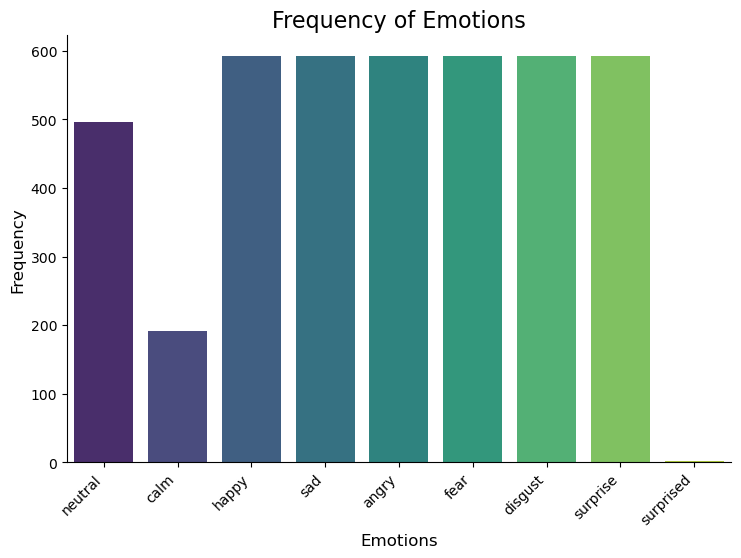

In [6]:
sns.catplot(x='Emotions', data=data_path, kind='count', palette='viridis', aspect=1.5)
plt.title('Frequency of Emotions', size=16)
plt.ylabel('Frequency', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [13]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(data)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()
    
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()
    plt.show()  


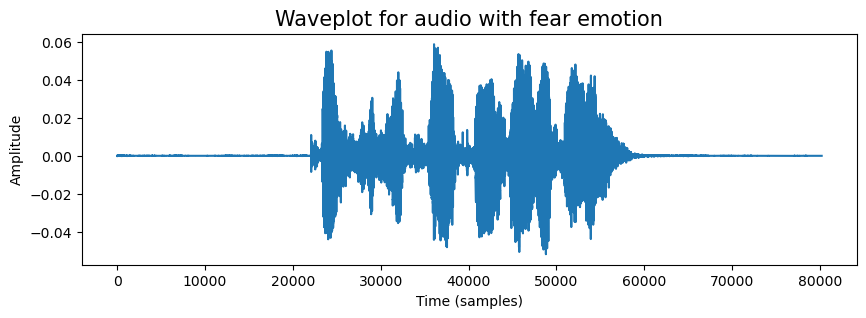

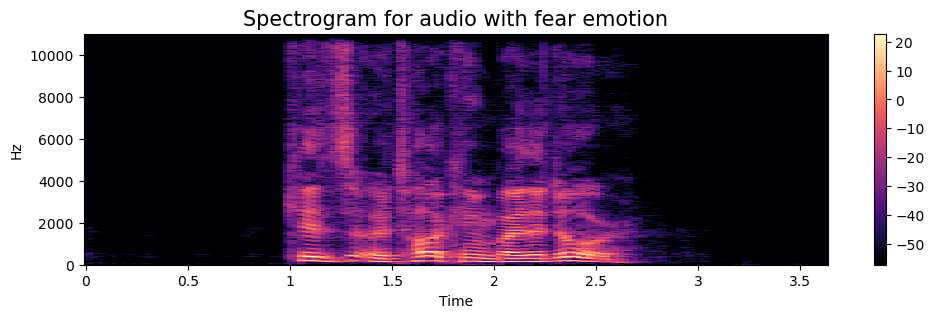

In [16]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

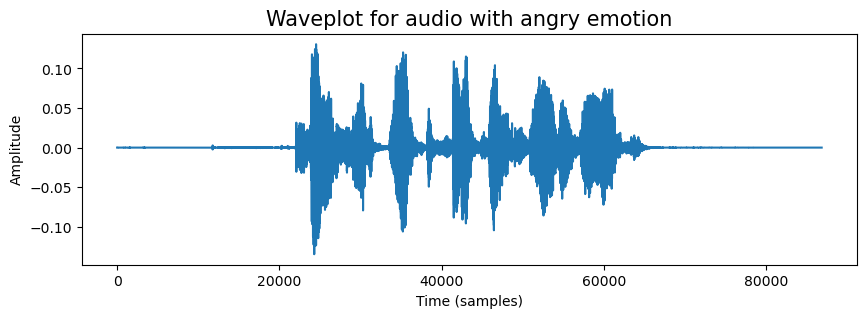

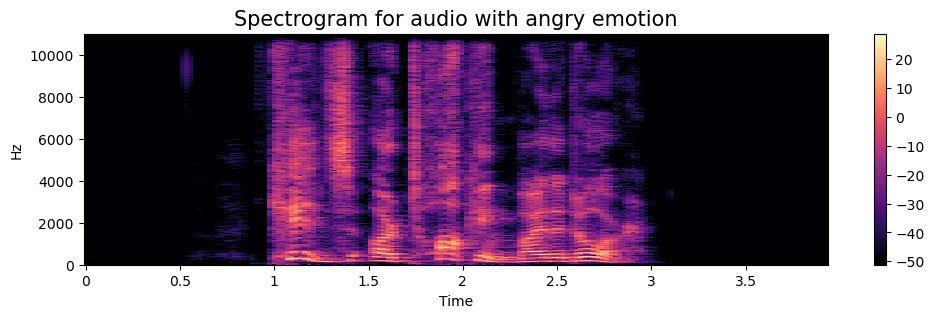

In [17]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

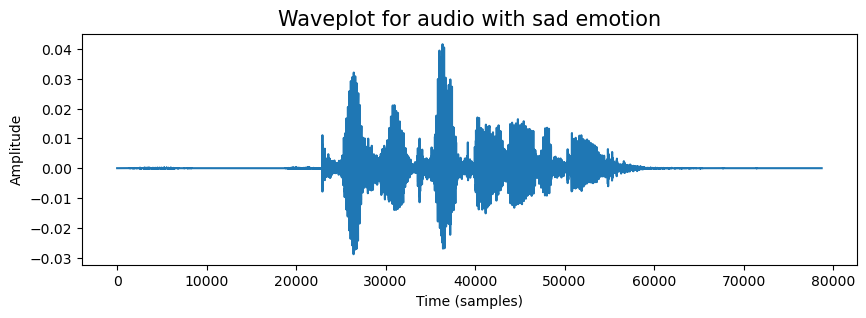

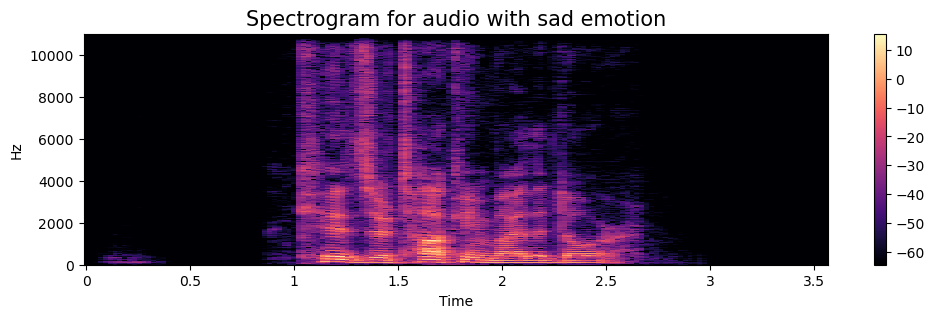

In [18]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

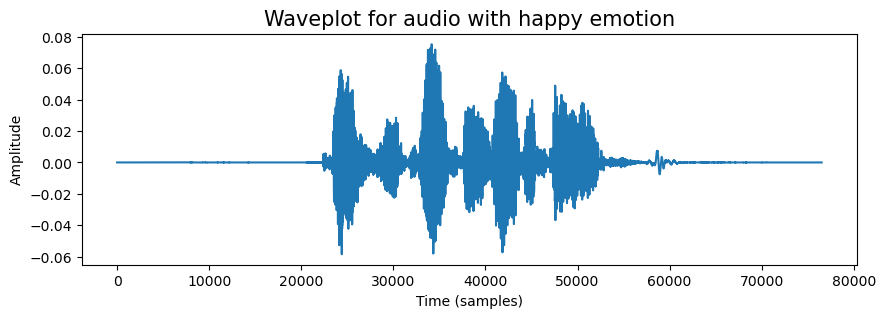

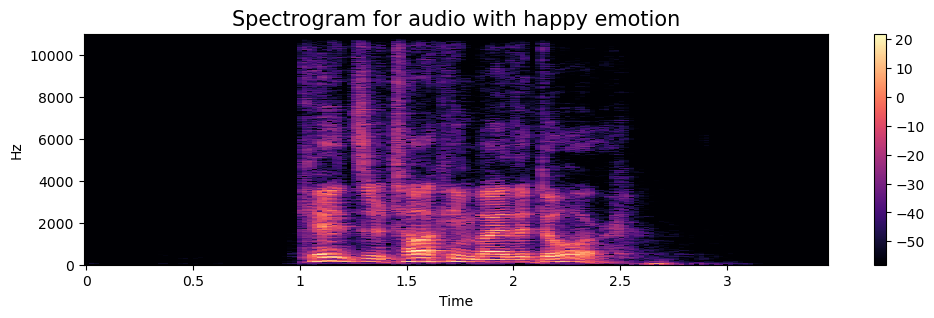

In [19]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [20]:
#Data Agumentation
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate= rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)


# Load audio data 
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)


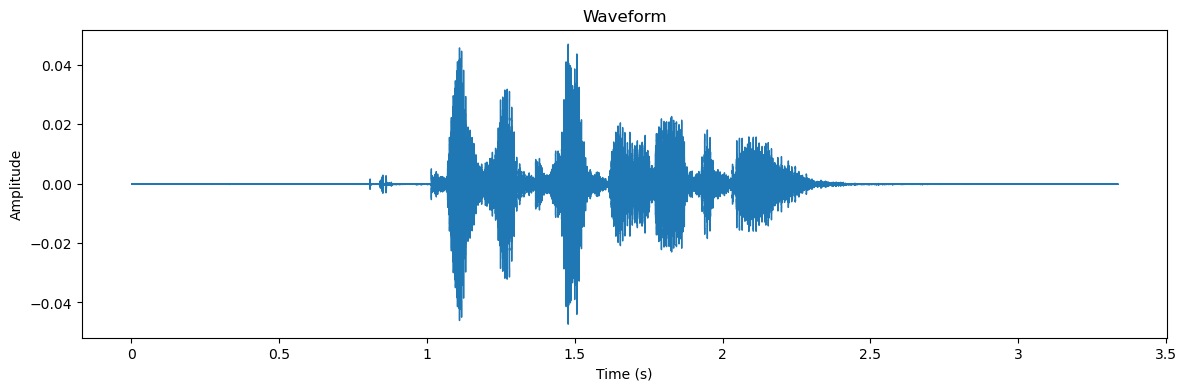

In [21]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the audio Simple
Audio(path)

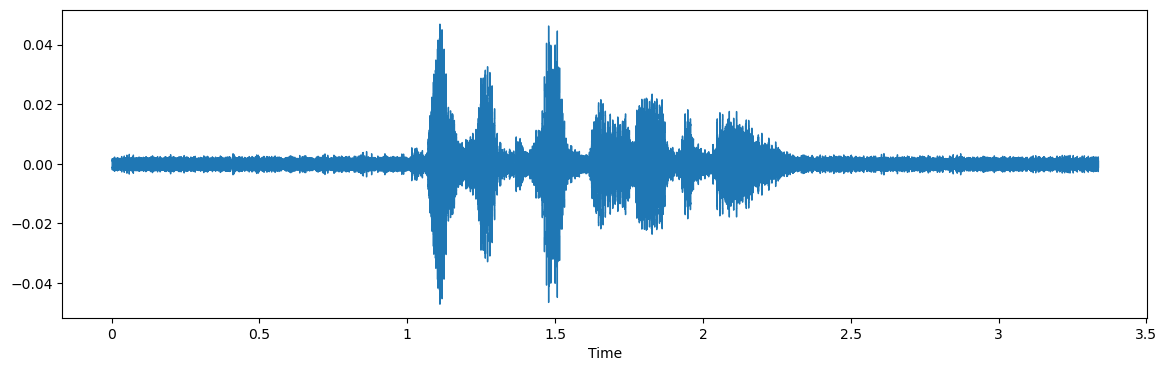

In [22]:
#noise injection
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

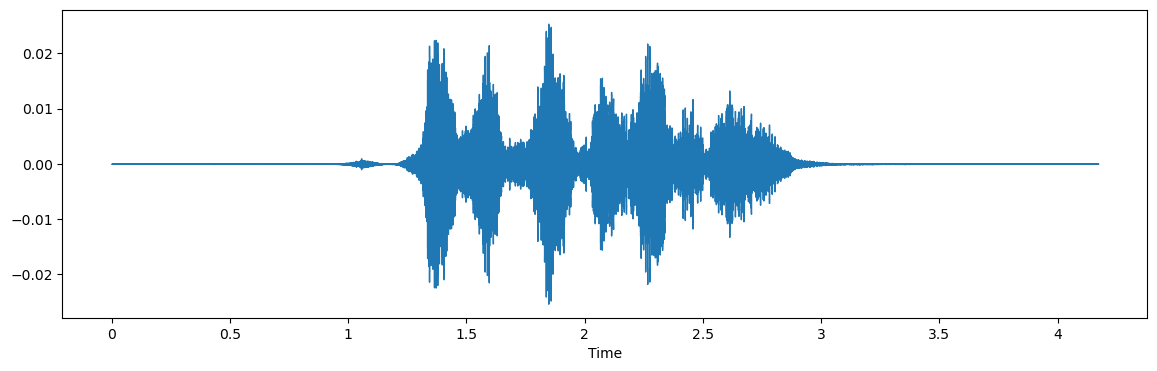

In [23]:
#Stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

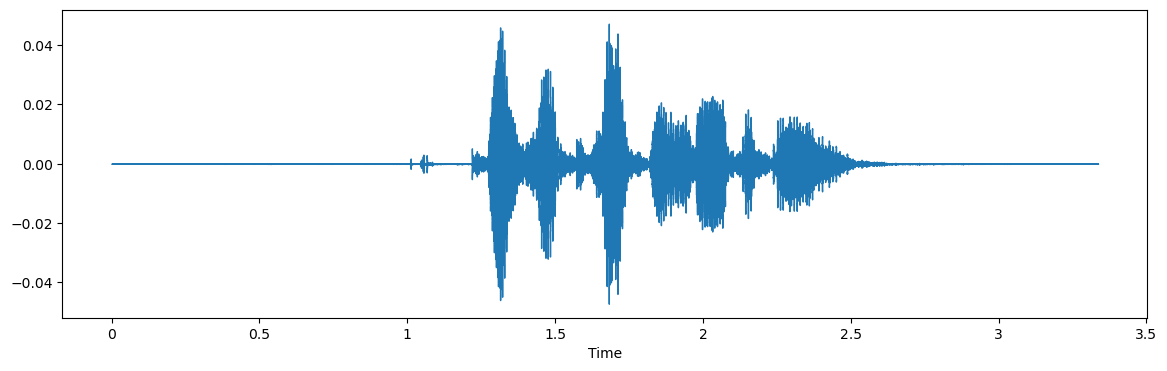

In [24]:
#shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

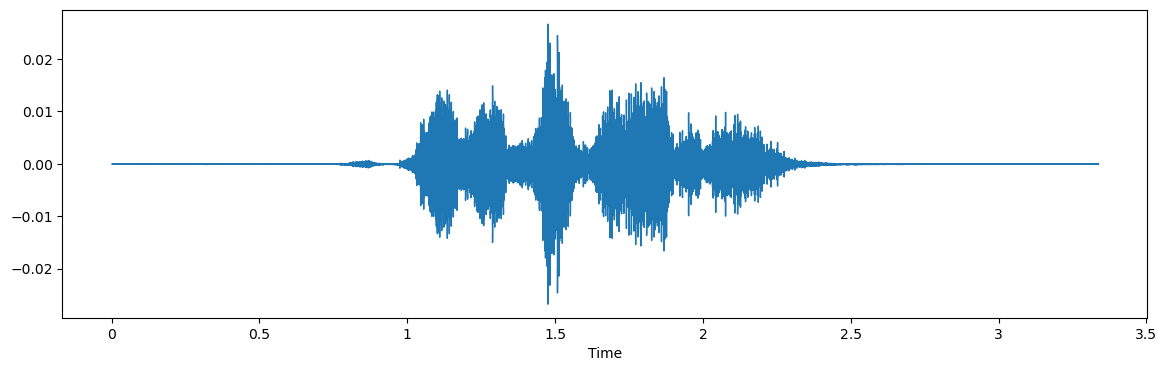

In [25]:
#pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [26]:
#Feature exctraction
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [28]:
len(X), len(Y), data_path.Path.shape

(8520, 8520, (4242,))

In [29]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750032  0.730624  0.735275  0.713529  0.660531   
1  0.282104  0.751779  0.786176  0.763781  0.771832  0.779721  0.693244   
2  0.188285  0.622130  0.699225  0.753333  0.721221  0.701736  0.682347   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.340689  0.780849  0.821695  0.830154  0.806220  0.808117  0.771935   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.668528  0.707344  0.739284  ...  5.964692e-06  5.092691e-06   
2  0.662826  0.686492  0.733961  ...  8.577343e-07  9.576414e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034949e-06   
4  0.666298  0.700591  0.732067  ...  1.991018e-04  1.954734e-04   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116493e-06  8.190282e-06  0.000007  0.000005   
1  4.030463e-06  4.230990e-06  7.211969e-06  1.037858e-05  0.000009  0.000007   
2  7.733593e-07  5.233101e-07  3.592793e-07  9.261689e-07  0.000002  0.000001   
3  6.654923e-06  6.979548e-06  1.214236e-05  9.640183e-06  0.000011  0.000006   
4  2.017401e-04  1.978372e-04  2.040367e-04  2.113547e-04  0.000208  0.000212   

            161   labels  
0  4.245834e-07  neutral  
1  2.318283e-06  neutral  
2  7.753987e-08  neutral  
3  4.254087e-07  neutral  
4  1.995412e-04  neutral  

[5 rows x 163 columns]

In [31]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [32]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6390, 162), (6390, 8), (2130, 162), (2130, 8))

In [34]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6390, 162), (6390, 8), (2130, 162), (2130, 8))

In [35]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6390, 162, 1), (6390, 8), (2130, 162, 1), (2130, 8))

In [36]:
# Model Building
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)         

In [37]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50


100/100 [==============================] - 20s 157ms/step - loss: 1.8312 - accuracy: 0.2881 - val_loss: 1.4949 - val_accuracy: 0.4272 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 15s 152ms/step - loss: 1.4522 - accuracy: 0.4371 - val_loss: 1.2929 - val_accuracy: 0.4977 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 16s 156ms/step - loss: 1.3164 - accuracy: 0.4825 - val_loss: 1.2132 - val_accuracy: 0.5089 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 15s 146ms/step - loss: 1.2091 - accuracy: 0.5266 - val_loss: 1.0485 - val_accuracy: 0.6056 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 15s 145ms/step - loss: 1.0911 - accuracy: 0.5903 - val_loss: 0.9733 - val_accuracy: 0.6559 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 17s 174ms/step - loss: 1.0435 - accuracy: 0.6108 - val_loss: 0.9617 - val_accuracy: 0.6531 - lr: 0.0010
Epoch 7/50
100/100 [==============================

In [38]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

67/67 [==============================] - 2s 23ms/step - loss: 0.6250 - accuracy: 0.8324
Accuracy of our model on test data :  83.23943614959717 %


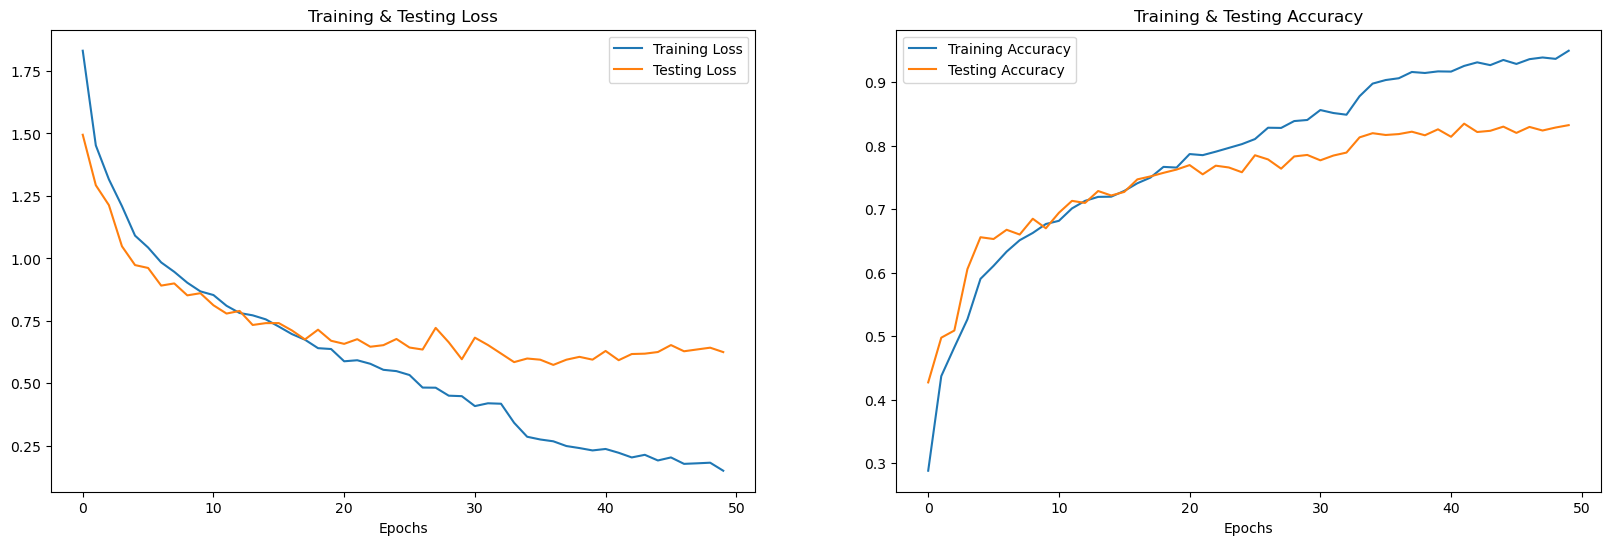

In [39]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [40]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

67/67 [==============================] - 2s 24ms/step


In [41]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad           sad
1          neutral       neutral
2             calm          calm
3              sad           sad
4              sad           sad
5          disgust       disgust
6          disgust       disgust
7         surprise      surprise
8             fear          fear
9          disgust           sad

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.90      0.89      0.89       307
        calm       0.70      0.88      0.78       153
     disgust       0.77      0.87      0.82       298
        fear       0.84      0.81      0.82       298
       happy       0.87      0.74      0.80       308
     neutral       0.90      0.83      0.87       223
         sad       0.84      0.76      0.80       266
    surprise       0.82      0.90      0.86       277

    accuracy                           0.83      2130
   macro avg       0.83      0.84      0.83      2130
weighted avg       0.84      0.83      0.83      2130



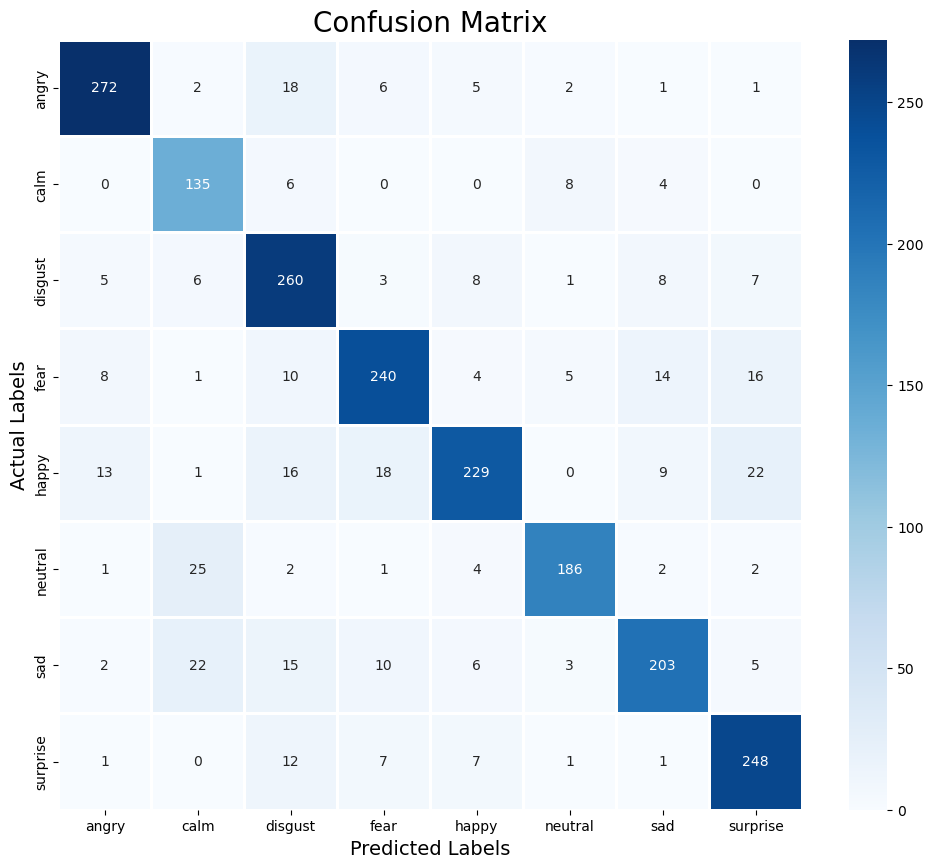

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [44]:
import pickle

# Assuming 'model' is your trained CNN model
model.save('model.h5')  # Save the model using TensorFlow's save method

# Load the saved model
loaded_model = tf.keras.models.load_model('model.h5')

# Serialize the loaded model using pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(loaded_model, pickle_out)
pickle_out.close()